# FIR Delay Effect


## Importing Libraries


In [518]:
##Scipy functions
import scipy.io.wavfile as wv
from scipy.ndimage import shift
from IPython.display import Audio

##Others
import numpy as np
from numpy.fft import fft
import os
import matplotlib.pyplot as plt

# Main


## Import .wav file as signal


In [519]:
DATA_FOLDER_PATH = "../Data" #Specify Data folder directory here
FILENAME = "string_2.wav" #Specify file name here


filepath = os.path.join(DATA_FOLDER_PATH, FILENAME)

In [520]:
sampleFreq, audio = wv.read(filepath) #reading audio signal here

In [521]:
sampleLen = len(audio)/sampleFreq
print(f"Sound is {sampleLen}s long")

Sound is 5.3474829931972785s long


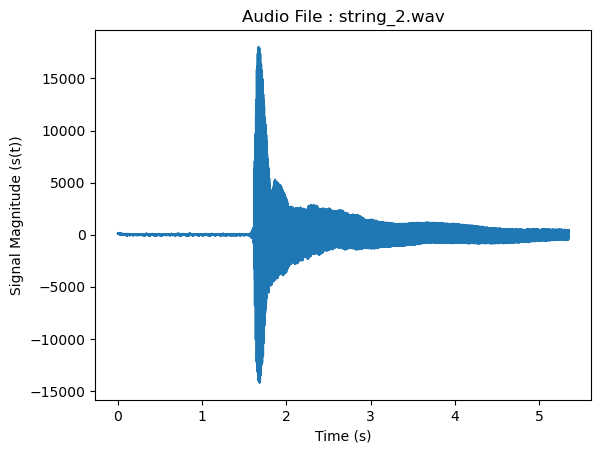

In [522]:
timeX = np.arange(0, sampleLen, 1/sampleFreq)

plt.plot(timeX, audio)
plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Audio File : {FILENAME}")

plt.show()

In [523]:
Audio(audio, rate=sampleFreq)

## FIR Filter


In [524]:
##Creating the FIR filter

def FIR(e, alpha, D):
    return e + alpha * shift(e, D)

In [525]:
#Random values

attenuationFactor = 0.5
timeDelay = int(len(audio) / 7)

In [526]:
FIRDelayedAudio = FIR(audio, attenuationFactor, timeDelay)

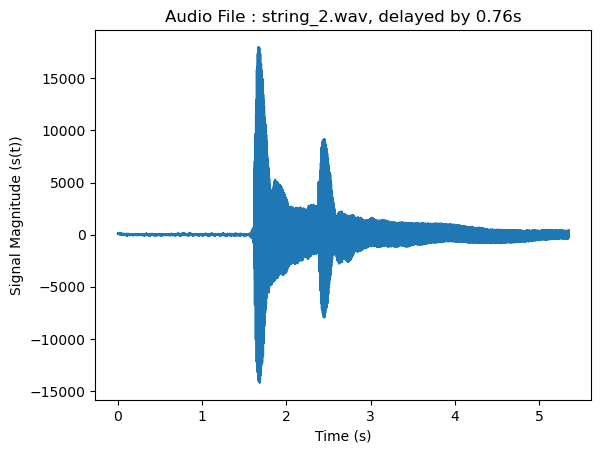

In [527]:
plt.plot(timeX, FIRDelayedAudio)
plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Audio File : {FILENAME}, delayed by {timeDelay / sampleFreq:.2f}s")

plt.show()

In [528]:
Audio(FIRDelayedAudio, rate=sampleFreq)

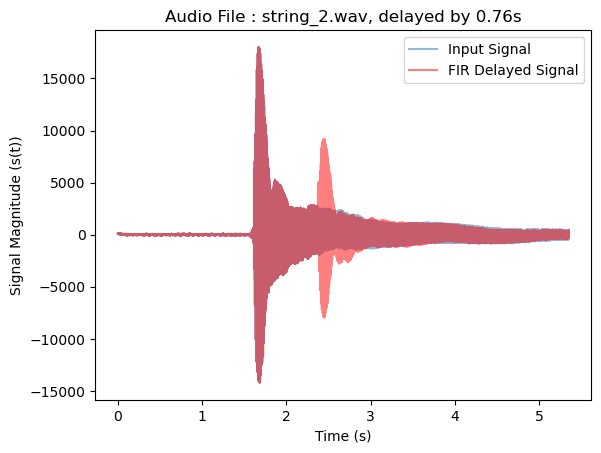

In [529]:
## Display both signal simultaneously
plt.plot(timeX, audio, alpha=.5, label ='Input Signal')
plt.plot(timeX, FIRDelayedAudio, alpha=.5, c='red', label='FIR Delayed Signal')

plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Audio File : {FILENAME}, delayed by {timeDelay / sampleFreq:.2f}s")
plt.legend()

plt.show()

### Impulse Response


In [530]:
#Creating the Dirac Impulse signal

impulseSignal = np.zeros(len(audio))
impulseSignal[0] = 1

In [531]:
## Calculate the filtered impulseSignal

FIRimpulseResponse = FIR(impulseSignal, attenuationFactor, timeDelay)

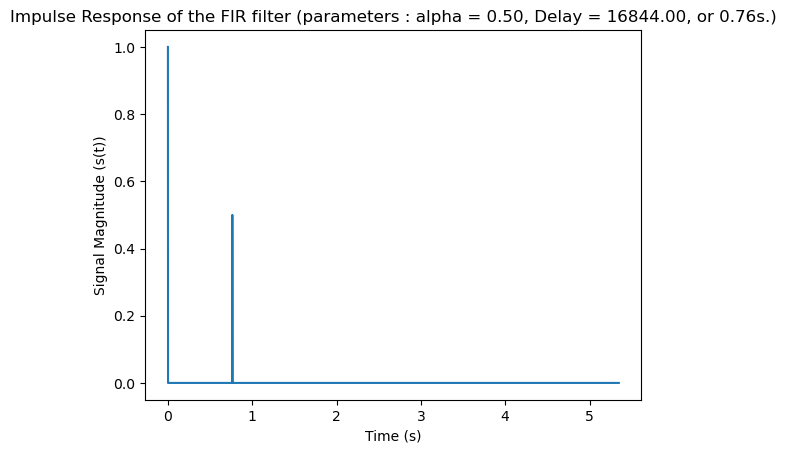

In [532]:
##Display FIR filter Impulse response

plt.plot(timeX, FIRimpulseResponse)
plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Impulse Response of the FIR filter (parameters : alpha = {attenuationFactor:.2F}, Delay = {timeDelay:.2f}, or {timeDelay / sampleFreq:.2f}s.)")

plt.show()

Since the Impulse is a dirac
\begin{equation}
\delta(t) =
\begin{cases}
1 & \text{if } t = 0 \\
0 & \text{if } t \neq 0
\end{cases}
\end{equation}

we can determine the impulse response exaclty :

\begin{equation}
FIR(\delta(t), \alpha, D) =
\begin{cases}
1 & \text{if } t = 0 \\
\alpha & \text{if } t = D \\
0 & \text{if } t \neq 0 \text{ or } t\neq D
\end{cases}
\end{equation}


### Frequency response


In [533]:
freqX = np.arange(0, sampleFreq/2, 1/sampleLen)

In [534]:
## The frequency response is the Fourier transform of the impulse response

FIRfreqResponse = fft(FIRimpulseResponse)

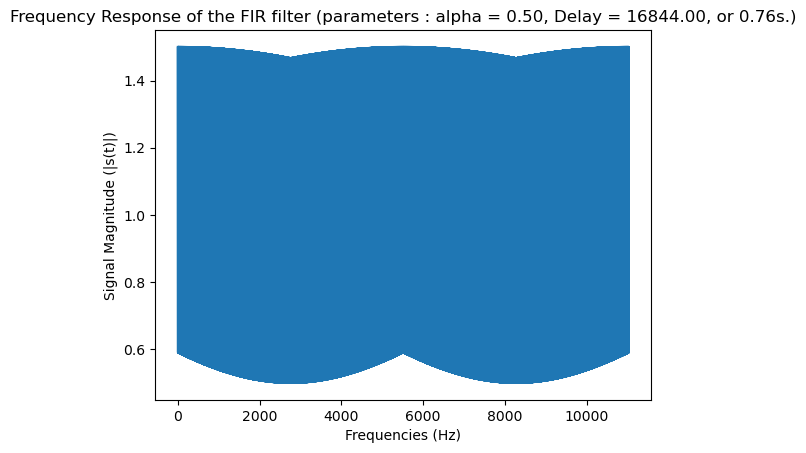

In [535]:
## Display magnitude response

plt.plot(freqX, abs(FIRfreqResponse)[0: len(freqX)])
plt.xlabel("Frequencies (Hz)")
plt.ylabel("Signal Magnitude (|s(t)|)")
plt.title(f"Frequency Response of the FIR filter (parameters : alpha = {attenuationFactor:.2F}, Delay = {timeDelay:.2f}, or {timeDelay / sampleFreq:.2f}s.)")

plt.show()

Analytical answer :

the FIR impulse response is :

\begin{equation}
h(t) =
\begin{cases}
1 & \text{if } t = 0 \\
\alpha & \text{if } t = D \\
0 & \text{if } t \neq 0 \text{ or } t\neq D
\end{cases}
\end{equation}

We can compute the frequency response H by taking the discrete Fourier transform of the impulse signal :

\begin{equation}
H(e^{j\omega}) = \sum\_{n=-\infty}^{\infty} h[n] e^{-j\omega n}
\end{equation}

Here, we have :

\begin{equation}
H(e^{i\omega}) = h[0] + h[D] e^{-j\omega D} = 1 + \alpha e^{-i\omega D}
\end{equation}


## IIR Filter


In [536]:
scalingFactor = 1.
attenuationFactor = .5
timeDelay = int(len(audio) / 7)

In [537]:
def IIR(e, alpha, beta, D):
    s = np.zeros_like(e) ##Initialize output signal with zeros
    for n in range(len(e)):
        if n < D:
            s[n] = alpha * e[n]
        else:
            s[n] = alpha * e[n] + beta * s[n-D]
    return s

In [538]:
IIRDelayedAudio = IIR(audio, scalingFactor, attenuationFactor, timeDelay)

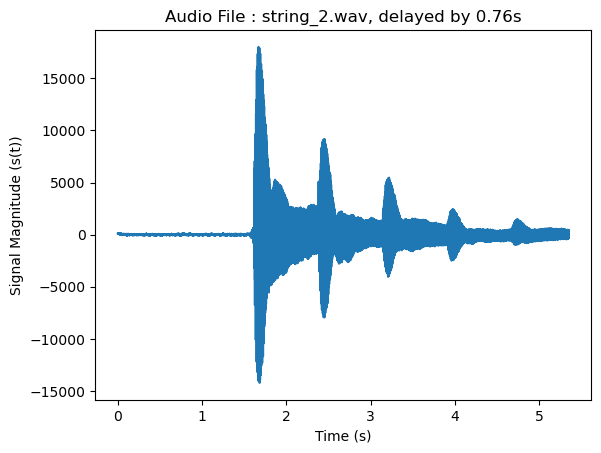

In [539]:
plt.plot(timeX, IIRDelayedAudio)
plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Audio File : {FILENAME}, delayed by {timeDelay / sampleFreq:.2f}s")

plt.show()

In [540]:
Audio(IIRDelayedAudio, rate=sampleFreq)

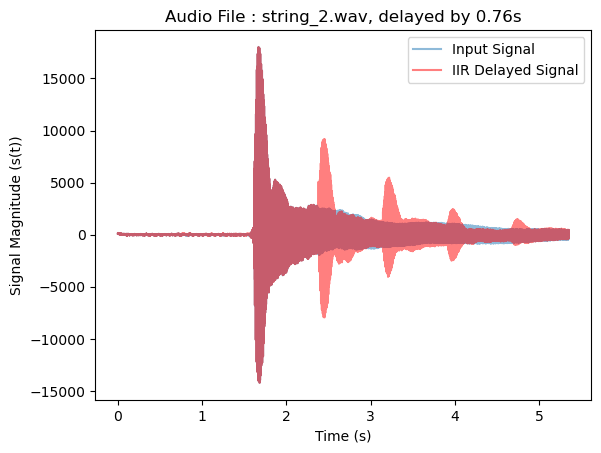

In [541]:
## Display both signal simultaneously
plt.plot(timeX, audio, alpha=.5, label ='Input Signal')
plt.plot(timeX, IIRDelayedAudio, alpha=.5, c='red', label='IIR Delayed Signal')

plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Audio File : {FILENAME}, delayed by {timeDelay / sampleFreq:.2f}s")
plt.legend()

plt.show()

### Impulse Response


In [542]:
## Calculate the filtered impulseSignal

IIRimpulseResponse = IIR(impulseSignal, scalingFactor, attenuationFactor, timeDelay)

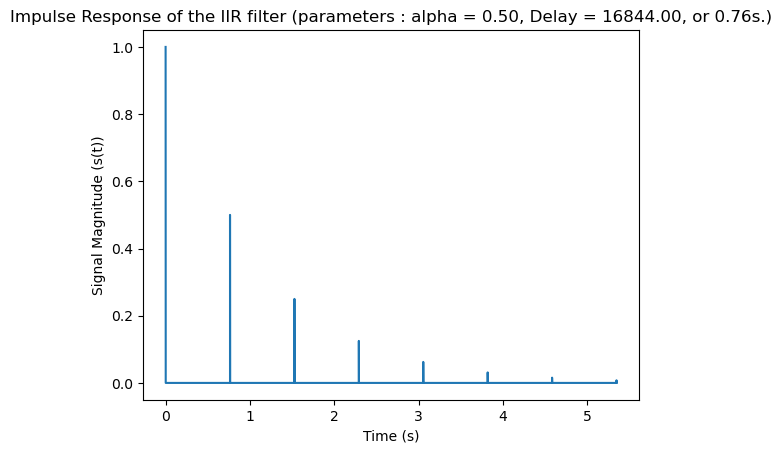

In [543]:
##Display IIR filter Impulse response

plt.plot(timeX, IIRimpulseResponse)
plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Impulse Response of the IIR filter (parameters : alpha = {attenuationFactor:.2F}, Delay = {timeDelay:.2f}, or {timeDelay / sampleFreq:.2f}s.)")

plt.show()

We can also analytically determine the impulse response :

At $t = 0$, we have $s(0) = \alpha e(0)$

for $t<D$, we have $s(t) = \alpha e(t) = 0$

At $t=D$, we have $s(D) = \alpha e(D) = \alpha \beta $

At $t>D$, we have $s(t) = \alpha e(t) + \beta s(n-D) = \beta s(n-D)$

By simple recursion, we can see that $s(kD) = \beta ^k \alpha$, and $0$ elsewhere.

We finally have :

\begin{equation}
h[n] = \begin{cases}
\beta^k \cdot \alpha & \text{if } n = kD \\
0 & \text{otherwise}
\end{cases}
\end{equation}


### Frequency response


We can numerically determine the frequency response by the same method as the FIR filter


In [544]:
## The frequency response is the Fourier transform of the impulse response

IIRfreqResponse = fft(IIRimpulseResponse)

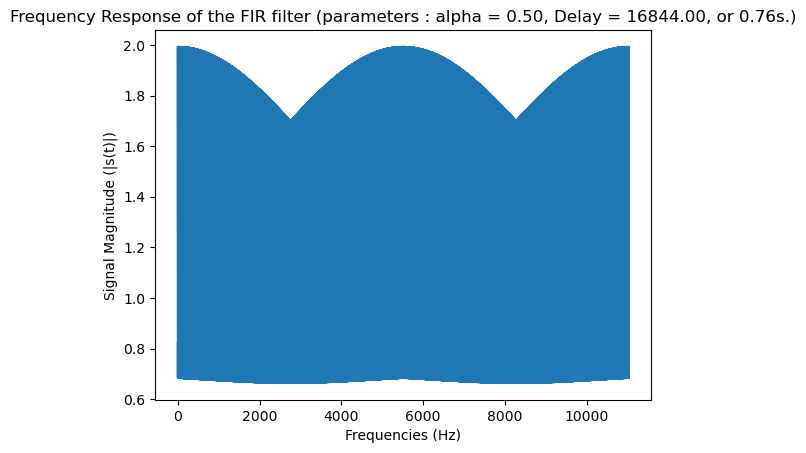

In [545]:
## Display magnitude response

plt.plot(freqX, abs(IIRfreqResponse)[0: len(freqX)])
plt.xlabel("Frequencies (Hz)")
plt.ylabel("Signal Magnitude (|s(t)|)")
plt.title(f"Frequency Response of the FIR filter (parameters : alpha = {attenuationFactor:.2F}, Delay = {timeDelay:.2f}, or {timeDelay / sampleFreq:.2f}s.)")

plt.show()

### Other questions


Stability :

We can see that when $beta > 1$, the magnitude will explode in magnitude at $t=+\inf$. This filter is then not always stable.

Difference with the FIR Filter :

The FIR filter delay the input signal, and with a single note played create a single echo. On the other hand, the IIR filter will generate infinite echos of the same note.
